# Video Games Analysis
## by Antoni Lawrence

This dataset is from Kaggle, and shows the sales of a number of popular video games from down the years from a select number of regions.

The dataset comes in the form of a csv. file, which we will clean and use to develop an insight into the sales figures.

Below, we are importing the relevant libraries from Pycharm that we will use to perform  all the operations needed.
There is also a library to remove any "future warnings" that may appear underneath the visualisations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

We can open our csv file with the below 'read_csv' function, which uses pandas, and saves the converted dataset to a variable that we can now use. The 'vd' directly below indicates we want to print the information, so we can see what we have.

In [2]:
vd = pd.read_csv('vgsales.csv')
vd

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


From here, we can inspect the data, which will allow us to begin the process of any necessary cleaning.
The .describe function gives us a statistical snapshot of the dataframe.

vd.describe()

The vd.columns function allows us to confirm the exact columns we have available, which can be fully described as:

Rank — Rank (or position), based on the total number of sales. This is in descending order.

Name — The name of the videogame.

Platform — The platform (or console) the game was released on.

Year — Year of release of the videogame.

Genre — The genre of the videogame.

Publisher — The publisher of the videogame.

NA_Sales — Sales in North America (by the million).

EU_Sales — Sales in Europe (by the million).

JP_Sales — Sales in Japan (by the million).

Other_Sales — Sales in the rest of the world (by the million).

Global_Sales — Total worldwide sales (by the million).

In [3]:
vd.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

The .info function will allow us to see what type of data type is assigned to each column.

In [4]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Here we can see that the column for 'Year' has the datatype 'float64'. This is a problem as the year needs to be seen in the proper date-time setting.

We can change this using the below Panda code, and then confirm the change has been made by again printing the dataframes .info.

In [5]:
vd['Year']=pd.to_datetime(vd['Year'])
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


The .duplicated. function allows us to check if there are any duplicated fields. Adding .sum to the end confirms there are none.

In [6]:
vd.duplicated().sum()

0

The .isnull().sum() function allows us to check if any of the columns contain any empty fields.
The below results confirm that there are a number in the 'Year' and 'Publisher' categories, which will prove problematic when analysing our data and drawing conclusions from our data.

In [7]:
vd.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

I believe the best thing to do is to completly remove any rows with empty fields, as they would have the potential to skew any future analysis made.
This can be performed using the .dropna function below.

In [8]:
vd=vd.dropna()

And when we perform the isnull().sum() again, we can confirm the dataframe has no duplicates.

In [9]:
vd.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

From here, I believe we are ready to begin looking into the data and produce some visualisations as none of the rows contain null items, and all of the data is consistent. This will allow us to give accurate and trustworthy feedback from our findings.

# First analysis visualisation
Below you can see the most represented video games by genre in the dataset. Action is the genre with the highest level of representation with over 3000 entries.

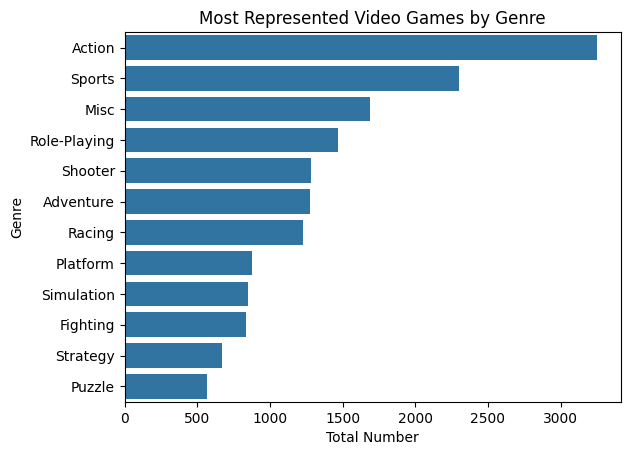

In [10]:
sns.countplot(y='Genre', data=vd, order=vd['Genre'].value_counts().index)
plt.xlabel('Total Number')
plt.title('Most Represented Video Games by Genre')
plt.show()

# Second analysis visualisation
The below graph has grouped each platform to shows us their indiviual global sales performance, with the original Nintendo and Gameboy lead the way by a fair margin.

In [11]:
average_sales_per_console = vd.groupby('Platform')['Global_Sales'].mean().reset_index()

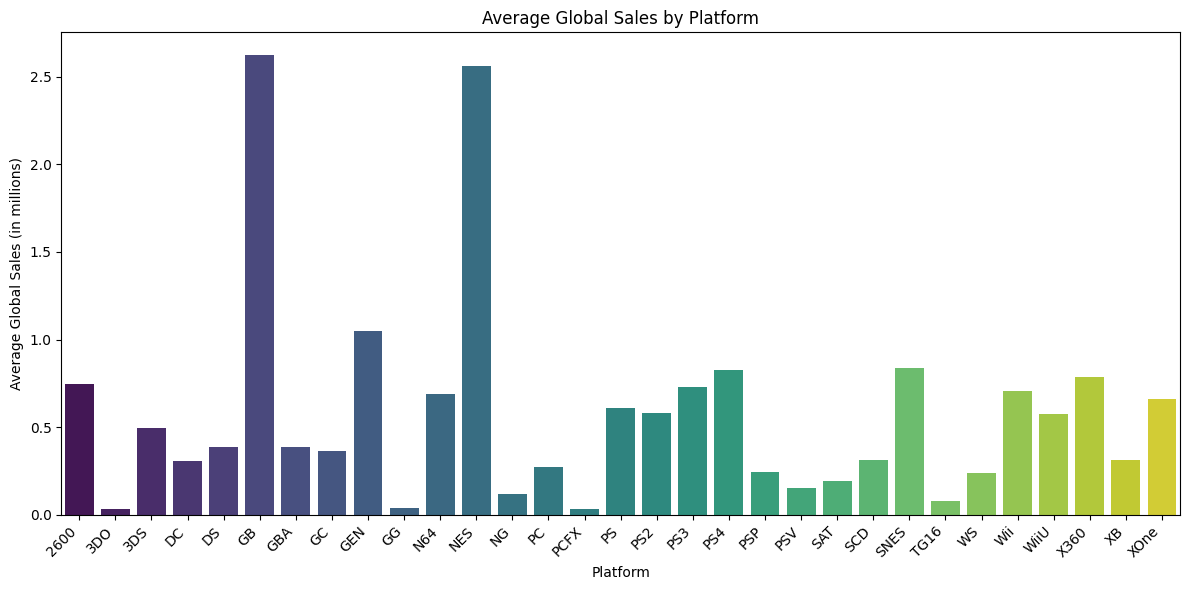

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=average_sales_per_console, x='Platform', y='Global_Sales', palette='viridis')
plt.title('Average Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Third analysis visualisation
The below visualisation shows us the total number of sales per region, with North America being the most popular.

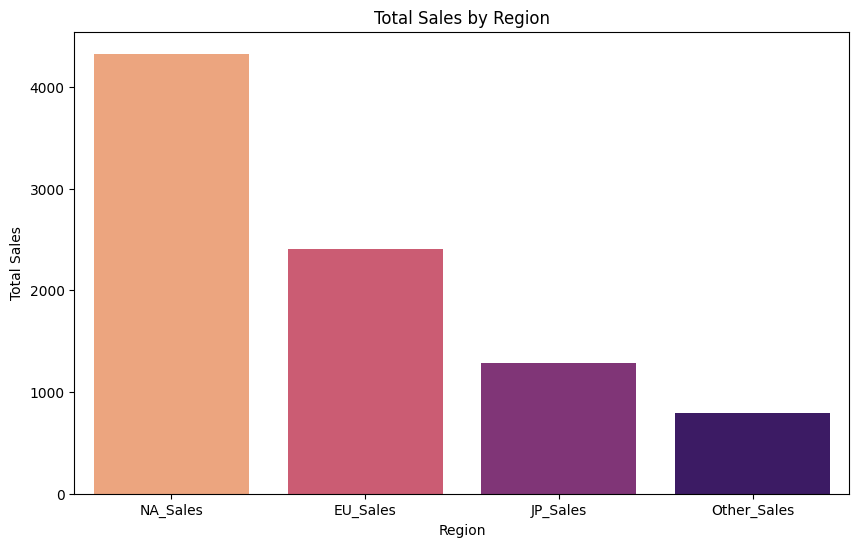

In [13]:
area_sales = vd[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
area_sales = area_sales.sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=area_sales.index, y=area_sales.values, palette='magma_r')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Fourth analysis visualisation
Below we are showing a visualisation of the top 2 sales regions, North America and Europe, and how North America eventually breaks away in terms of its sales.

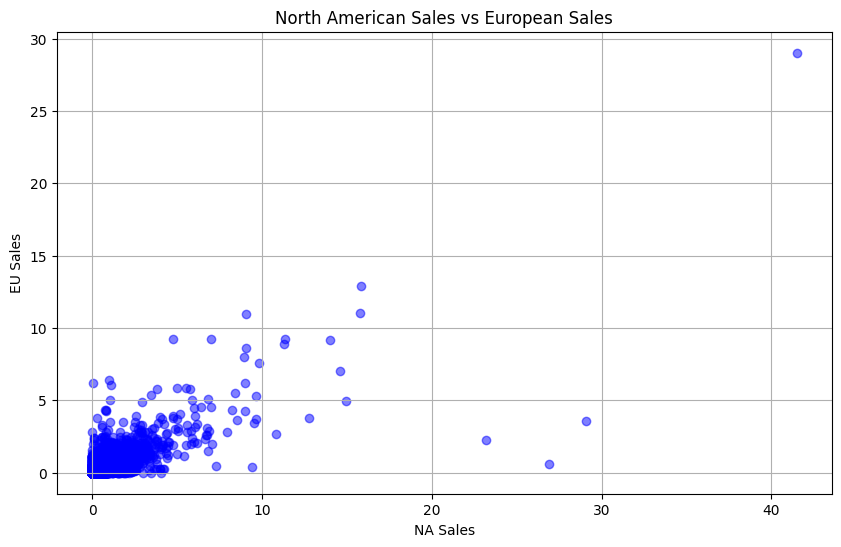

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(vd['NA_Sales'], vd['EU_Sales'], color='blue', alpha=0.5)
plt.title('North American Sales vs European Sales')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.grid(True) 
plt.show()

Conclusion
Our first visualisation shows the Action genre as being the highest represented. With Sports falling a little away in second place, we can conclude that people, generally speaking, enjoy games that are fast paced, as the Puzzle and Strategy genres are the two bottom placed.

Our second visualisation shows the Average Global Sales by Platform. We can see that the GameBoy and Nintendo are by far the highest selling Platforms. As the rest of the platforms show an even spread, this could be due to the earlier release date of the Gameboy and Nintendo games, and a lack of competition from other Platforms in the 1980's and early 1990's.

Our third visualisation shows that North America dominates in Total Sales by Region, by close to double from its nearest competitor, Europe. We can easily put this down to not only North America's size, but also the power of its marketing and advertising industry as a whole. Although it is fair to say, that even though it is still regarded as a largely populated country, Japan does well to hang on the coattails of its larger competitors.

Our fourth visualisation shows the correlation between the sales of the two biggest markets, North America and Europe. The majority of spread is even, but a few outliers seem to skew the overall numbers heavily in favour of the North American market. Looking at the top two ranked games, we can see that the number of units sold for Wii Sports and Super Mario Bros. heavily contribute to these numbers.

We can conclude that North America has lead the Video Game sales market for the best part of 40 years, and will likely to continue to do so. We could presume this is due to North America's lifestyle leaning more on the sedentric side, and further studies, possible into the general habits outside of work/education of the regions could help us draw further conclusions, and also help us predict future rises and falls in sales.

